<a href="https://colab.research.google.com/github/SathishVeera01/Advanced_Python_Lab/blob/main/Lab_Activity15_22MID0160.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LAB ACTIVITY 15
## NAME : Sathish V
## REG NO : 22MID0160
## DATE : 23/09/2025

## TASK - 1: The Life Cycle of Matplotlib

In [1]:
# Importing the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from PIL import Image # Importing PIL library to work on with image data

import matplotlib.pyplot as plt
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Importing image data into Numpy arrays

img = np.asarray(Image.open('/content/drive/MyDrive/housefly.png'))
print(repr(img)) # Each inner list represents a pixel. Here, with an RGB image, there are 3 values. Since it's a black and white image, R, G, and B are all similar.

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)


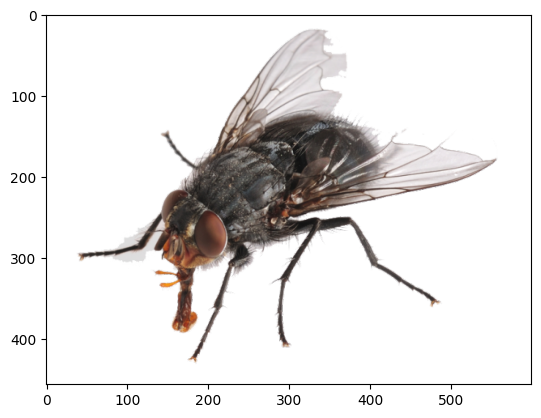

In [6]:
# Plotting numpy arrays as images
imgplot = plt.imshow(img)

Text(0.5, 1.0, 'Pseudocolor of a Grayscale Image')

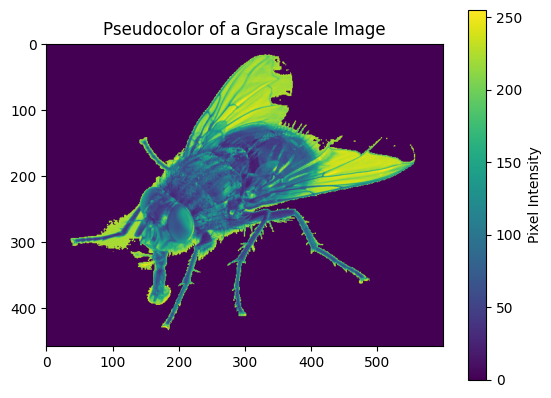

In [7]:
# Applying pseudocolor schemes to image plots

lum_img = img[:, :, 0] # Pseudocolor is only relevant to single-channel, grayscale, luminosity images
plt.imshow(lum_img)    # It is picking one channel(R) of our data and  using array slicing

# Add a colorbar to show the mapping of pixel intensity to color
plt.colorbar(label='Pixel Intensity')

# Add a title
plt.title('Pseudocolor of a Grayscale Image')

In [8]:
# Print matrix shapes

print("Original image shape:", img.shape)   # (height, width, channels)
print("Luminosity image shape:", lum_img.shape)   # (height, width)

# Compare on pixel comparison

print("\nOriginal pixel (0,0):", img[0, 0])      # full RGB values
print("Luminosity pixel (0,0):", lum_img[0, 0])  # only Red channel value

Original image shape: (457, 600, 4)
Luminosity image shape: (457, 600)

Original pixel (0,0): [0 0 0 0]
Luminosity pixel (0,0): 0


In [9]:
# Print repr of both (truncated for readability)
print("repr(img) [truncated]:", repr(img)[:300], "...\n")
print("repr(lum_img) [truncated]:", repr(lum_img)[:300], "...\n")

repr(img) [truncated]: array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...

repr(lum_img) [truncated]: array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8) ...



In [10]:
# Expand lum_img to 3 channels for fair diff
lum_expanded = np.stack([lum_img, lum_img, lum_img], axis=-1)

# Difference matrix
diff = img - lum_expanded

print("\nDifference matrix sample (5x5 pixels):")
print(diff[:5, :5, :])

ValueError: operands could not be broadcast together with shapes (457,600,4) (457,600,3) 

### Explanation:

- The original image (img) is a 3D NumPy matrix → [height, width, 3/4] (RGB).
- The luminosity image (lum_img) is a 2D matrix → [height, width] because selected only one channel (Red).
- repr(img) → shows 3D RGB structure.
- repr(lum_img) → shows 2D grayscale structure.

- Pixel level:
    - img[0,0] = [R, G, B]
    - lum_img[0,0] = R

- Expanded luminosity → [[R, R, R], ...]
    - Difference (img - lum_expanded) →
        - Red channel → all zeros (R - R = 0)
        - Green channel → G - R
        - Blue channel → B - R

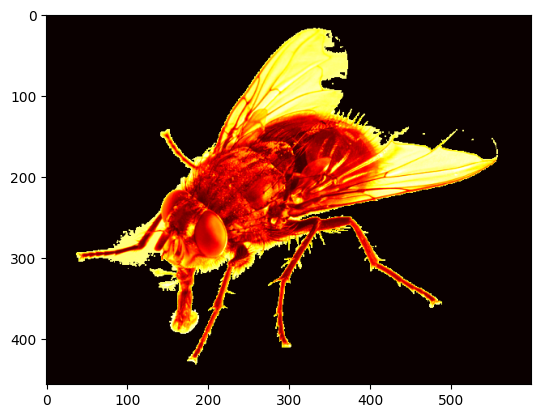

In [11]:
# luminosity (2D, no color) image, the default is called viridis. There are plenty of others (ex: hot)

plt.imshow(lum_img, cmap="hot")

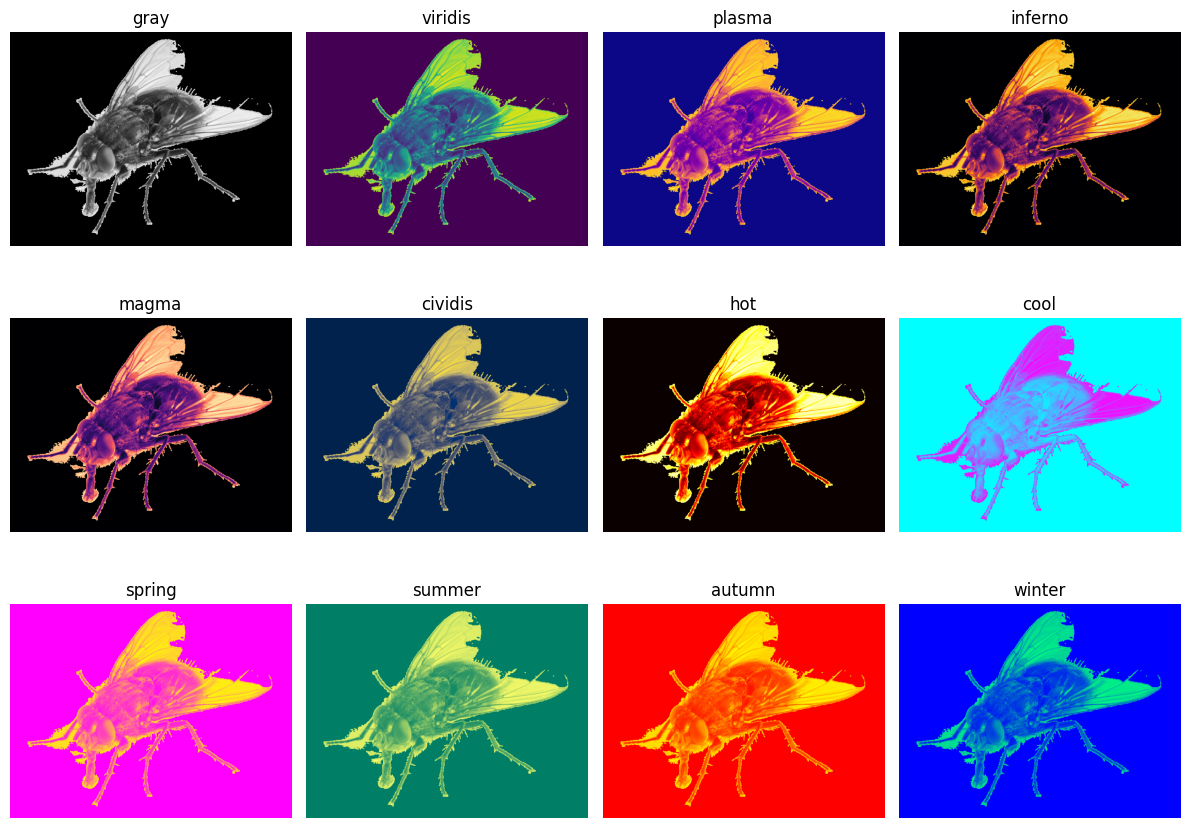

In [12]:
# List of colormaps to demonstrate
cmaps = ["gray", "viridis", "plasma", "inferno", "magma", "cividis", "hot", "cool", "spring", "summer", "autumn", "winter"]

# Plot all colormaps
fig, axs = plt.subplots(3, 4, figsize=(12, 9))

for ax, cmap in zip(axs.ravel(), cmaps):
    ax.imshow(lum_img, cmap=cmap)
    ax.set_title(cmap)
    ax.axis("off")

plt.tight_layout()
plt.show()

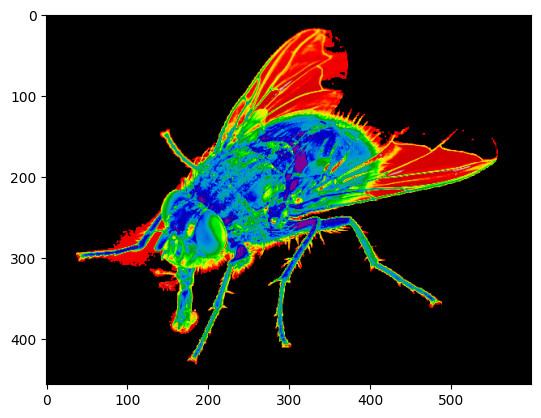

In [13]:
# change colormaps on existing plot objects using the set_cmap() method

imgplot = plt.imshow(lum_img)
imgplot.set_cmap('nipy_spectral')

- imgplot.set_cmap('nipy_spectral') changes it to the nipy_spectral colormap without using cmap argument directly.
- repr(img) (original RGB array) → has 3 channels (H × W × 3).
- lum_img (just one channel) → is 2D, shape (H × W).
- On apply set_cmap, we are only changing how the 2D data is represented visually, not the underlying pixel values.

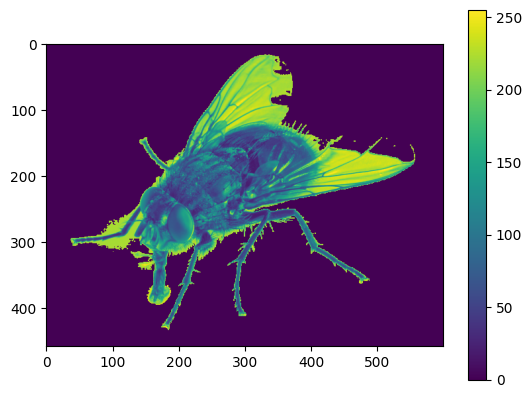

In [14]:
# Color scale reference

imgplot = plt.imshow(lum_img)
plt.colorbar() # dds a color scale on the side, so you can see how numerical pixel values (0–1 in this case) are mapped to colors.

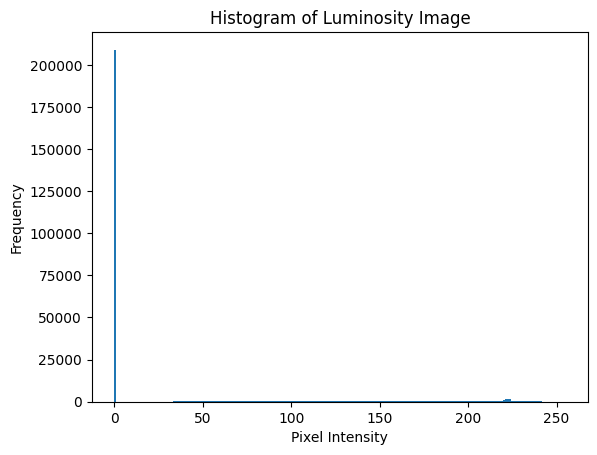

In [15]:
# Examining a specific data range

plt.hist(lum_img.ravel(), bins=range(256), fc='blue', ec='white') # bins Set the bins from 0 to 255 (the full range of 8-bit pixel values).
                                                           # fc Set the face color (fc) of the histogram bars to blue.
                                                           # ec Set the edge color (ec) of the histogram bars to white.
plt.title("Histogram of Luminosity Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

 - X-axis (Pixel Intensity)

    - Shows all possible intensity values of the image pixels.

    - Since lum_img is a grayscale/luminosity image, pixel values range from 0 (black) to 255 (white).

    - Each bin corresponds to one intensity value (because bins=range(256)).

- Y-axis (Frequency)

    - Shows how many pixels in the image have that intensity.

    - A high bar means that many pixels share the same intensity value.

    - A low bar means few pixels have that intensity.

- Face color (fc='blue') & Edge color (ec='white')

    - Makes the bars visually distinct and helps separate bins for clarity.
    - Mostly dark image → most bars are on the left (low intensity).
    - Mostly bright image → bars are on the right (high intensity).
    - High contrast image → values spread across the entire x-axis.
    - Low contrast image → values concentrated in a narrow range.

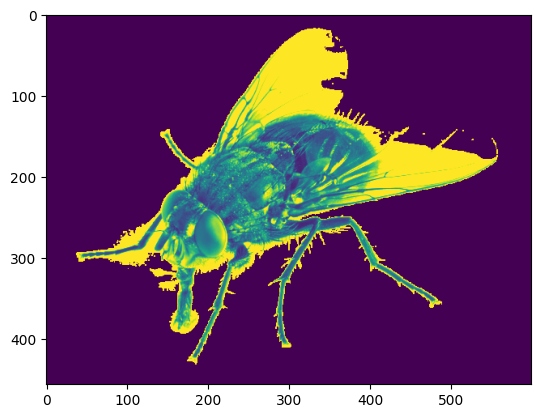

In [16]:
plt.imshow(lum_img, clim=(0, 175))  # Limits the displayed intensity range.
# Pixel values below 0 → mapped to the minimum color (black).
# Pixel values above 175 → mapped to the maximum color (white or highest color in the colormap).
# Pixel values between 0–175 → mapped proportionally to the colormap.

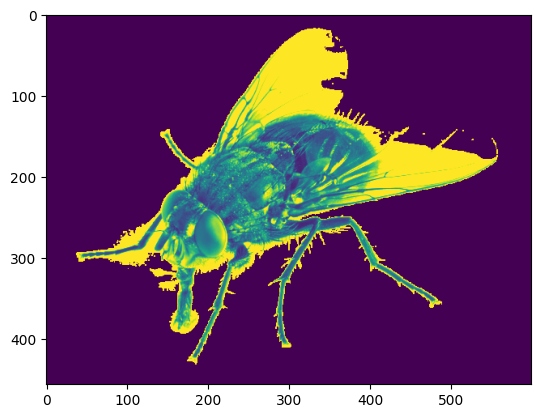

In [17]:
imgplot = plt.imshow(lum_img)

# Set display limits after plotting
imgplot.set_clim(0, 175) # # clip and rescale colors to 0-175 range

In [18]:
# Array Interpolation schemes

# Interpolation calculates what the color or value of a pixel "should" be, according to different mathematical schemes.
# One common place that this happens is when we resize an image.
# The number of pixels change, but we want the same information. Since pixels are discrete, there's missing space.

# Interpolation is how we fill that space.
# This is why the images sometimes come out looking pixelated when we blow them up.
# The effect is more pronounced when the difference between the original image and the expanded image is greater.

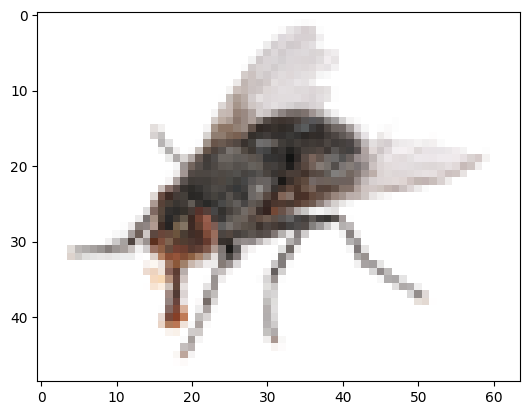

In [22]:
img = Image.open('/content/drive/MyDrive/housefly.png')
img.thumbnail((64, 64))  # Resize image in-place to 64x64
imgplot = plt.imshow(img)

# Maintains the original aspect ratio, so the final size may not be exactly 64×64 in both dimensions.
# thumbnails: Useful for reducing image size for faster display or processing.

In [23]:
# Load original image
img_orig = Image.open('/content/drive/MyDrive/housefly.png')

# Convert to NumPy for comparison
orig_array = np.array(img_orig)

# Resize using thumbnail
img_resized = img_orig.copy()
img_resized.thumbnail((64, 64))
resized_array = np.array(img_resized)

# Compare shapes
print("Original shape:", orig_array.shape)
print("Resized shape:", resized_array.shape)

# Compare a sample pixel
print("Original pixel [0,0]:", orig_array[0,0])
print("Resized pixel [0,0]:", resized_array[0,0])

Original shape: (457, 600, 4)
Resized shape: (49, 64, 4)
Original pixel [0,0]: [0 0 0 0]
Resized pixel [0,0]: [0 0 0 0]


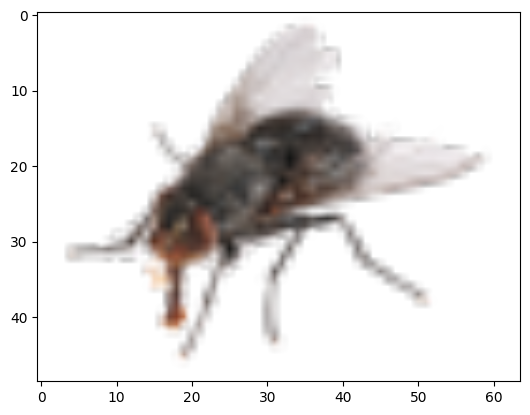

In [24]:
imgplot = plt.imshow(img, interpolation="bilinear") # resampling method bilinear in PIL

## Mathematical explanation behind the Pixel Difference (between original and resized image)
### Bilinear (default when using thumbnail() with antialias)
- Computes weighted average of 4 neighboring pixels.
- new_pixel = P11*0.25 + P12*0.25 + P21*0.25 + P22*0.25
- 4×4 block of pixels is combined into 1 pixel in the smaller image.

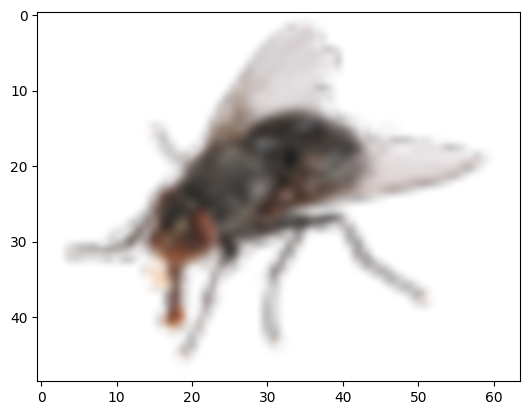

In [25]:
imgplot = plt.imshow(img, interpolation="bicubic") # resampling method bicubic in PIL

## Mathematical explanation behind the Pixel Difference (between original and resized image)
### Bicubic

- Uses 16 neighboring pixels for smoother results.
- More complex weighted average.

## Finding the inverse of image (In Matrix of pixel values) and finding the negative image (inverted image)

In [26]:
# Load the image
img = Image.open("/content/drive/MyDrive/housefly.png")          # load image
img = img.convert("RGB")                    # ensure 3 channels
img_array = np.array(img)                   # convert to NumPy array

In [27]:
print("Original Image array: ",img_array)

Original Image array:  [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [28]:
# Find the inverse (negative image)
# For 8-bit images, max pixel value is 255
negative_img_array = 255 - img_array
print("Inverted Image Array",negative_img_array)

Inverted Image Array [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


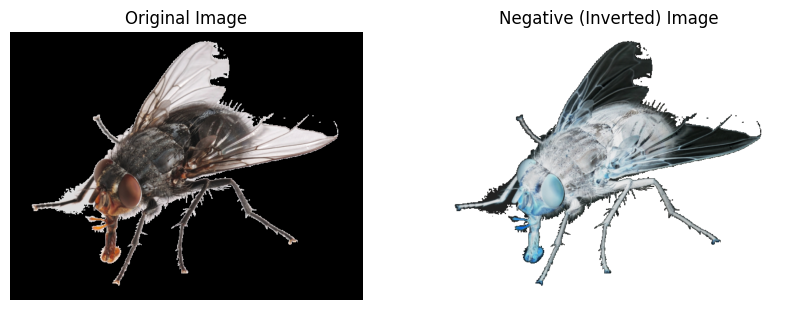

In [29]:
# Display original and negative side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(img_array)
axs[0].set_title("Original Image")
axs[0].axis("off")

axs[1].imshow(negative_img_array)
axs[1].set_title("Negative (Inverted) Image")
axs[1].axis("off")

plt.show()

##Plotting numerical data, categorical data, text data (Word cloud), ordinal data, audio data and image data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load Housing dataset
data = pd.read_csv("/content/drive/MyDrive/diabetes.csv")

#### 1. Numerical Data (price)

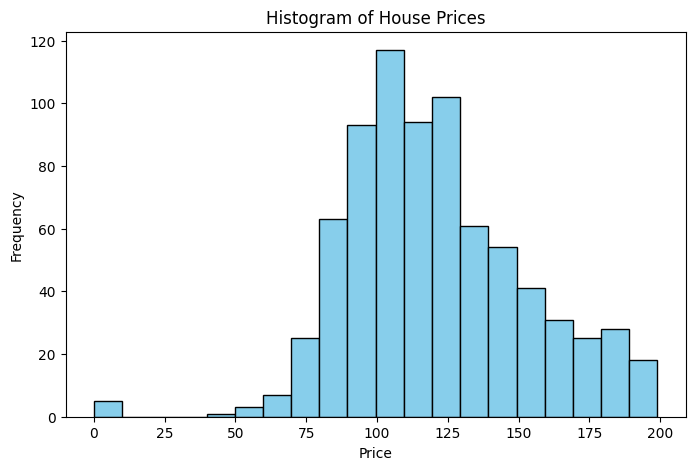

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(data['Glucose'], bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram of House Prices") # frequency of prices
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

#### 2. Categorical Data (mainroad)

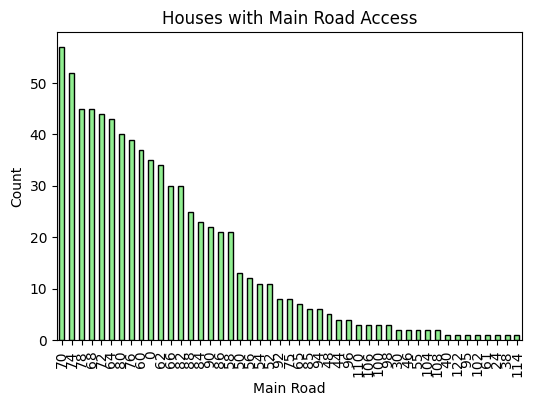

In [ ]:
plt.figure(figsize=(6,4))
data['BloodPressure'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Houses with Main Road Access") # y axis provide the count of categorical data
plt.xlabel("Main Road")
plt.ylabel("Count")
plt.show()

#### 5.Image Data – Plot image

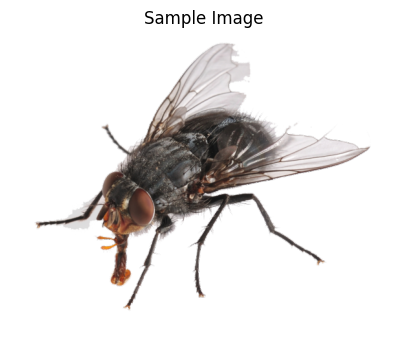

In [30]:
from PIL import Image

img = Image.open('/content/drive/MyDrive/housefly.png')  # load an image
plt.figure(figsize=(5,5))
plt.imshow(img)  # Displays the image
plt.axis("off")
plt.title("Sample Image")
plt.show()